* A markov chain is irreducible if there exists  $n_{ij}$ such that $P_{ij}^{(n_{ij})}$ for all $i,j$

* Es aperiódica cuando el número de pasos necesario para ir de un estado al otro no es un múltiplo de un entero (no hay ciclos)

* Una cadena de Markov es estacionaria si $\pi^* = \pi^* P $

Ejemplo:
$ P = \left( \begin{array}{ccc}
0.5, 0.25, 0.25 \\
0.5, 0.0, 0.0 \\
0.25, 0.25, 0.5
\end{array}\right)$

$\pi(0) = [0,1,0]$

$\pi(2 = \pi(0) P^2 = (0.375, 0.25, 0.375)$

$ \pi(7) = \pi(0)P^7 = (0.4, 0.2, 0.4)s$

Si cambiamos $\pi(0) = (1,0,0)$

$\pi(7)=\pi(0) P ^7 = [(0.4, 0.2, 0.4)$

$(pi^* )^T$ es vector propio de $P^T$ con $\lambda = 1$.

La condicion ara la convergencia a una distribución estacionaria es que la cadena sea irreducible y aperiódica.


Una cadena de Markov tiene una distribución estacionaria única si

$P(j\to k) \pi^*_j = P(k\to j) \pi ^*_k$ (detailed balance)

"$\pi = \pi P$"

$(\pi P)_j = \sum_i \pi_i P(i\to j) = \sum_i \pi_j P(j\to i) = \pi_j \sum_i P(j\to i) = \pi_j$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Metrópolis

We need samples from $P(x)

Assume we can evaluate $P^*$ ($P(x) = P^*(x)/Z$)


1. Start with $x_0$ s.t. $P^*(x_0)>0$. 

    For t in [1 ... ]
2. Generate $x^*$ from $Q(x|x_{t-1})$ (jumping distribution)
Metropolis condition ($Q(x^*|x_{t-1}) = Q(x_{t-1}|x^*)$)

3. Calculate $\alpha = P^*(x^*)/P^*(x_{t-1})$

4. if $\alpha>1$ accept $x^*$. Else accept $x^*$ with probability $\alpha$. Osea generar una bernoulli con probabilidad $\alpha$



Mi ejemplo:

$P_1(x) = x(1-x), x\in[0,1]$

$P_2(x) = x^3(1-x), x\in[0,1]$

$P_2(x) = x(1-x)^3, x\in[0,1]$

$Q(x) = \mathcal{N}(x_{t-1},0.5)$

In [2]:
from scipy import stats
from scipy.integrate import quad

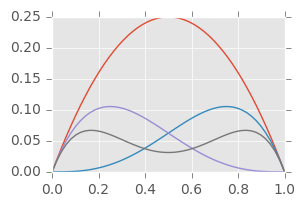

In [3]:
def Ps1(x):
    p = x*(1-x)
    return np.where(p<0,0.0,p)
def Ps2(x):
    p = x**3*(1-x)
    return np.where(p<0,0.0,p)
def Ps3(x):
    p = x*(1-x)**3
    return np.where(p<0,0.0,p)
def Ps4(x):
    return x**5*(1-x)+x*(1-x)**5

plt.figure(figsize=(3,2))
plt.plot(np.linspace(0,1),Ps1(np.linspace(0,1)))
plt.plot(np.linspace(0,1),Ps2(np.linspace(0,1)))
plt.plot(np.linspace(0,1),Ps3(np.linspace(0,1)))
plt.plot(np.linspace(0,1),Ps4(np.linspace(0,1)))

In [4]:
def genQ(xprev,xmin,xmax,my_std,size=1):
    myclip_a = xmin
    myclip_b = xmax
    my_mean = xprev
    a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
    return stats.truncnorm.rvs(a,b,loc=my_mean,scale=my_std,size=size)

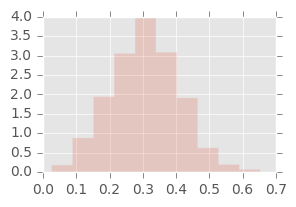

In [42]:
r = genQ(0.3,0.0,1.0,0.1,size=1000)
plt.figure(figsize=(3,2))
plt.hist(r,normed=True,histtype='stepfilled',alpha=0.2);

In [47]:
def metropolis(x0,T,genQ,Ps):
    x = np.zeros(T)
    x[0] = x0
    t = 0
    while t<len(x)-1:
        t+=1
        xs = genQ(x[t-1],0,1,0.1)
        alpha = Ps(xs)/Ps(x[t-1])
        if alpha>=1:
            x[t] = xs
        else:
            bernoulli = np.random.binomial(1,alpha)
            if bernoulli==1: 
                x[t] = xs
            else: 
                t = t-1
    return x

In [26]:
T = 1000
x0 = 0.1

def compare(x,Ps,burn=True,skip=True):
    if burn: x = x[100:]
    plt.hist(x,normed=True,bins=50)
    orden = np.argsort(x)
    plt.plot(x[orden],Ps(x[orden])/quad(Ps,0,1)[0])

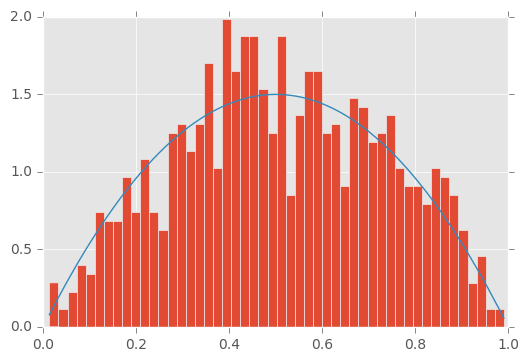

In [27]:
x1 = metropolis(x0,T,genQ,Ps1)
compare(x1,Ps1)

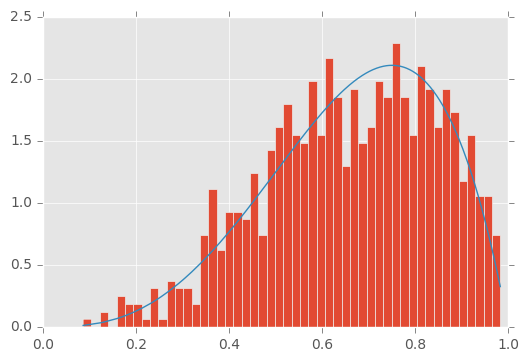

In [28]:
x2 = metropolis(x0,T,genQ,Ps2)
compare(x2,Ps2)

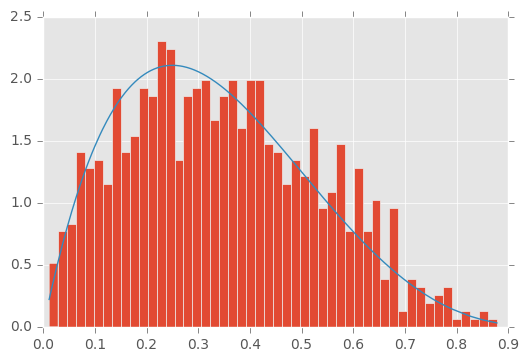

In [29]:
x3 = metropolis(x0,T,genQ,Ps3)
compare(x3,Ps3)

In [48]:
T = 100000
x4 = metropolis(x0,T,genQ,Ps4)

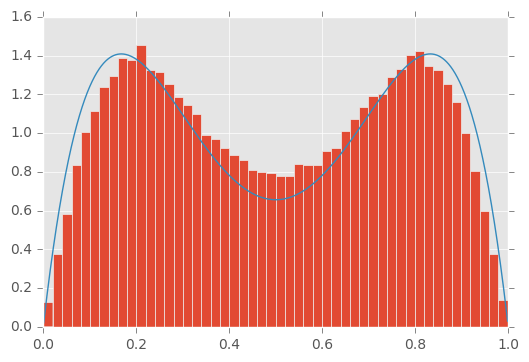

In [49]:
compare(x4,Ps4)

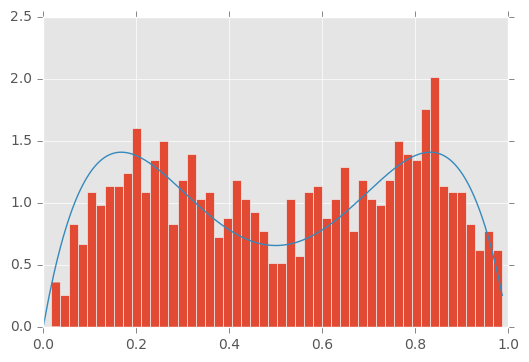

In [50]:
orden = np.argsort(x4)[::100]
plt.hist(x4[::100],normed=True,bins=50)
plt.plot(x4[orden],Ps4(x4[orden])/quad(Ps4,0,1)[0])